In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew


In [2]:

tweets_117= pd.read_csv("/Users/caranix/Library/CloudStorage/OneDrive-TheOhioStateUniversity/CS MS/legislative tweets analysis/tweets_117_merged_v2.csv")
tweets_116= pd.read_csv("/Users/caranix/Library/CloudStorage/OneDrive-TheOhioStateUniversity/CS MS/legislative tweets analysis/tweets_116_merged_v2.csv")
tweets_115 = pd.read_csv("/Users/caranix/Library/CloudStorage/OneDrive-TheOhioStateUniversity/CS MS/legislative tweets analysis/tweets_115_merged_v1.csv")


/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_85143/2199559552.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_117= pd.read_csv("/Users/caranix/Library/CloudStorage/OneDrive-TheOhioStateUniversity/CS MS/legislative tweets analysis/tweets_117_merged_v2.csv")
/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_85143/2199559552.py:2: DtypeWarning: Columns (1,5,6,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_116= pd.read_csv("/Users/caranix/Library/CloudStorage/OneDrive-TheOhioStateUniversity/CS MS/legislative tweets analysis/tweets_116_merged_v2.csv")
/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_85143/2199559552.py:3: DtypeWarning: Columns (2,5,7,13,14,20,21,24,25,26,27,37) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_115 = pd.read_csv("/Users/caranix/Library/CloudStorage/OneDrive-TheOhioStateUniversity/CS MS

Text(0.5, 9.444444444444438, 'Sentiment Score')

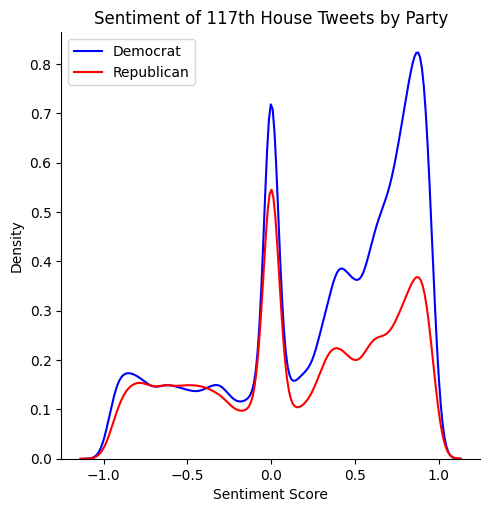

In [4]:
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html

#The units on the density axis are a common source of confusion. 
#While kernel density estimation produces a probability distribution, the height of the curve at each point gives 
#a density, not a probability. A probability can be obtained only by integrating the density across a range. 
#The curve is normalized so that the integral over all possible values is 1, 
#meaning that the scale of the density axis depends on the data values.

palette ={0: "Red", 1: "Blue"}

sns.displot(data=tweets_117, x="vader_score", hue="Democrat", kind="kde", palette =palette, legend= False)
plt.legend(labels= ['Democrat', 'Republican'])
plt.title("Sentiment of 117th House Tweets by Party")
plt.xlabel("Sentiment Score")


#plt.savefig('117thHousekde_v2.png', dpi=300, bbox_inches='tight')

#ax.legend(labels=["Republican", "Democrat"])
#plt.show(g)



#plt.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])
#plt.show(g)


In [6]:
tweets_116["party"] = np.where(tweets_116['party_code']== 200.0, 0,
                                      np.where(tweets_116['party_code']== 328.0, 0,
                                      np.where(tweets_116['party_code']== 100.0, 1, "nan")))
                                      
                                      
                                      
tweets_116= tweets_116[tweets_116["party"] !="nan"]
tweets_116["party"]= tweets_116["party"].astype("int64")                  

/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_85143/3496145557.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_116["party"]= tweets_116["party"].astype("int64")


Text(0.5, 9.444444444444438, 'Sentiment Score')

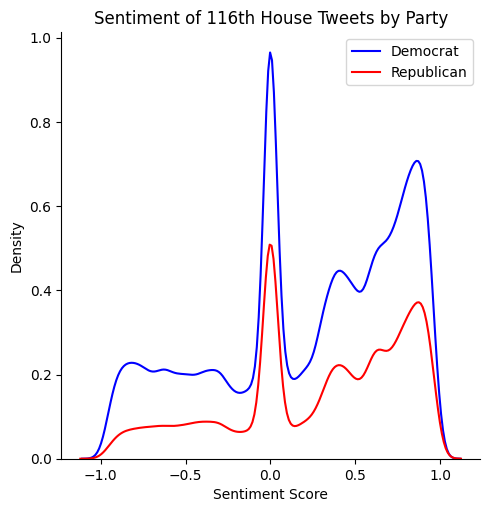

In [13]:
palette ={0: "Red", 1: "Blue"}

sns.displot(data=tweets_116, x="vader_score", hue="party", kind="kde", palette =palette, legend= False)
plt.legend(labels= ['Democrat', 'Republican'])
plt.title("Sentiment of 116th House Tweets by Party")
plt.xlabel("Sentiment Score")

#plt.savefig('116thHousekde_v2.png', dpi=300, bbox_inches='tight')


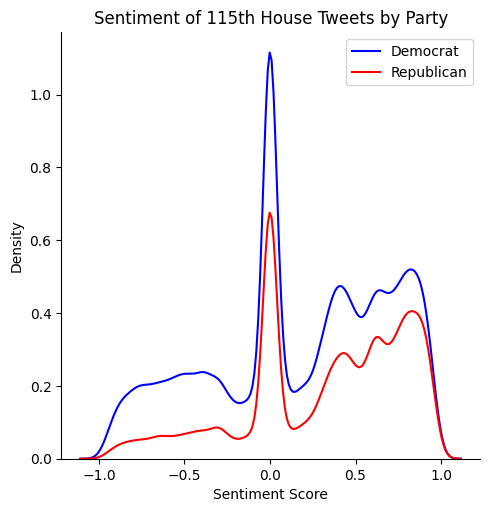

In [21]:
palette ={0: "Red", 1: "Blue"}

sns.displot(data=tweets_115, x="vader_score", hue="party", kind="kde", palette =palette, legend= False)
plt.legend(labels= ['Democrat', 'Republican'])
plt.title("Sentiment of 115th House Tweets by Party")
plt.xlabel("Sentiment Score")

plt.savefig('115thHousekde_v1.png', dpi=300, bbox_inches='tight')


In [19]:
from scipy import stats

ks= stats.ks_2samp(tweets_117[tweets_117["Democrat"] ==0].vader_score, tweets_117[tweets_117["Democrat"] ==1].vader_score)
print(ks)
ks.pvalue<(.05/4)

KstestResult(statistic=0.13123755099007794, pvalue=0.0, statistic_location=0.3814, statistic_sign=1)


True

In [20]:
from scipy import stats

ks= stats.ks_2samp(tweets_116[tweets_116["party"] ==0].vader_score, tweets_116[tweets_116["party"] ==1].vader_score)
print(ks)
ks.pvalue<(.05/4)

KstestResult(statistic=0.059005939972565424, pvalue=0.0, statistic_location=-0.001, statistic_sign=-1)


True

In [4]:
from scipy import stats

ks= stats.ks_2samp(tweets_115[tweets_115["party"] ==0].vader_score, tweets_115[tweets_115["party"] ==1].vader_score)
print(ks)
ks.pvalue<(.05/4)

KstestResult(statistic=0.12470919088539809, pvalue=0.0, statistic_location=-0.0031, statistic_sign=-1)


True

In [7]:
d_115= tweets_115[tweets_115.Democrat == 1] # dem tweets_116
d_115["congress"]= "115"
d_116= tweets_116[tweets_116.party == 1] # dem tweets_116
d_116["congress"]= "116"
d_117= tweets_117[tweets_117.Democrat == 1] # dem tweets_116
d_117["congress"]= "117"
# all dem tweets 
dem_tweets= pd.concat([d_115, d_116, d_117])

/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_85143/3903417880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_115["congress"]= "115"
/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_85143/3903417880.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_116["congress"]= "116"
/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_85143/3903417880.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [8]:
dem_tweets.congress= dem_tweets.congress.astype('int64')


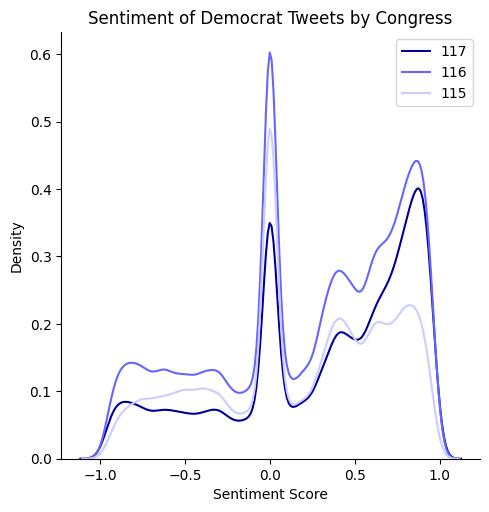

In [20]:
#palette = {115: "#DEEFF5", 116 : "#68b7fa", 117: "#1f1fff"}

palette = {115: "#ccccff", 116 : "#6666ff", 117: "#000099"}


sns.displot(data=dem_tweets, x="vader_score", hue="congress", kind="kde", palette =palette, legend= False)
plt.legend(labels= ['117', '116', '115'])
plt.title("Sentiment of Democrat Tweets by Congress")
plt.xlabel("Sentiment Score")

plt.savefig('DemCompare_v2.png', dpi=300, bbox_inches='tight')


In [15]:
r_115= tweets_115[tweets_115.Democrat == 0] # dem tweets_116
r_115["congress"]= "115"
r_116= tweets_116[tweets_116.party == 0] # dem tweets_116
r_116["congress"]= "116"
r_117= tweets_117[tweets_117.Democrat == 0] # dem tweets_116
r_117["congress"]= "117"
# all dem tweets 
rep_tweets= pd.concat([r_115, r_116, r_117])
rep_tweets.congress= rep_tweets.congress.astype('int64')


/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_85143/3576128595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_115["congress"]= "115"
/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_85143/3576128595.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_116["congress"]= "116"
/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_85143/3576128595.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

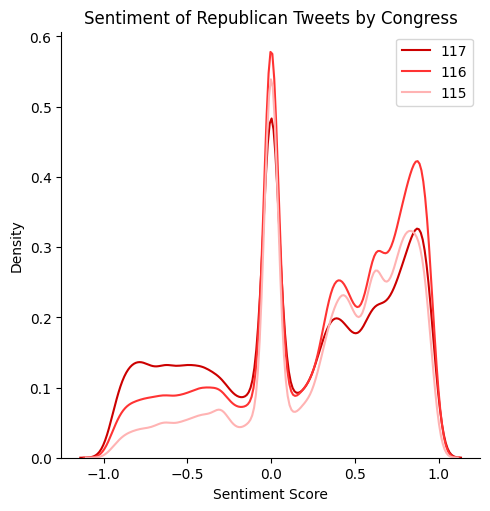

In [19]:
#palette = {116 : "#fec4c4", 117: "#fc1414"}

palette = {115: "#ffb3b3", 116 : "#ff3333", 117: "#cc0000"}

sns.displot(data=rep_tweets, x="vader_score", hue="congress", kind="kde", palette =palette, legend= False)
plt.legend(labels= ['117', '116', '115'])
plt.title("Sentiment of Republican Tweets by Congress")
plt.xlabel("Sentiment Score")

#plt.savefig('RepCompare_v2.png', dpi=300, bbox_inches='tight')


In [43]:
ks= stats.ks_2samp(rep_tweets[rep_tweets["congress"] ==116].vader_score, rep_tweets[rep_tweets["congress"] ==117].vader_score)
print(ks)
ks.pvalue<(.05/4)

KstestResult(statistic=0.09922068129704575, pvalue=0.0, statistic_location=-0.0005, statistic_sign=-1)


True

In [45]:
ks= stats.ks_2samp(dem_tweets[dem_tweets["congress"] ==116].vader_score, dem_tweets[dem_tweets["congress"] ==117].vader_score)
print(ks)
ks.pvalue<(.05/4)

KstestResult(statistic=0.0787188275529237, pvalue=0.0, statistic_location=0.5096, statistic_sign=1)


True

In [46]:
# doesn't really matter if distributions are the same...or not we care about skew 
#  For unimodal continuous distributions, a skewness value greater than zero means 
# that there is more weight in the right tail of the distribution. 

# a skew value less than 0 indicates there is more weight in the left tail of distriubtion 
skew(r_116.vader_score)

-0.5770162329105407

In [47]:
skew(r_117.vader_score)

-0.30096082422110004

In [49]:
skew(d_116.vader_score)

-0.4882252703971145

In [48]:
skew(d_117.vader_score)

-0.7143345955202794